In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
1.064*6.022E23/13*1E-4*2.17E-2*1E-24

150/3.6667155982838e-20/60

6.818090830851787e+19

Particles/neutron:  17524124473561.068
1.468172867108605e-16
[1.63460186e-15 1.66771865e-15 1.56985506e-15 1.79817795e-15
 2.63501719e-15]


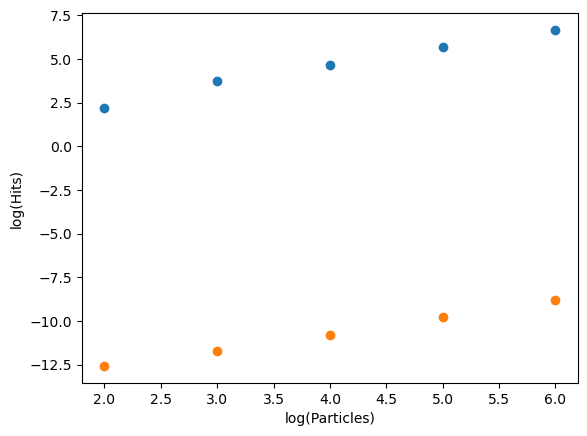

In [3]:
part_uA = 1
particles = 1
sec = 1
hr = 60*60*sec
uRem = 1
coulomb = 6.241509E18*particles

amp = 1*coulomb/sec

dose_rate = 150.1 *uRem/hr

particle_uA = amp*10E-6

print("Particles/neutron: ", 1/(213.7/(particle_uA*60)))

dose_p_part_exp = dose_rate / (4.55*particle_uA)
print(dose_p_part_exp)

N_Particles = np.array([1000000,100000,10000,1000,100])
N_Hits = np.array([4545588,457537,43653,5749,162])
Dose = np.array([1.6346018622916e-09,1.6677186473538e-10,1.5698550570883e-11,1.7981779469474e-12,2.6350171870598e-13])

dose_p_part = Dose/N_Particles
print(dose_p_part)

plt.figure()
plt.scatter(np.log10(N_Particles),np.log10(N_Hits))
plt.xlabel("log(Particles)")
plt.ylabel("log(Hits)")
plt.scatter(np.log10(N_Particles),np.log10(Dose))
plt.show()

2.6544146759999997e-07
0.05180700275220686


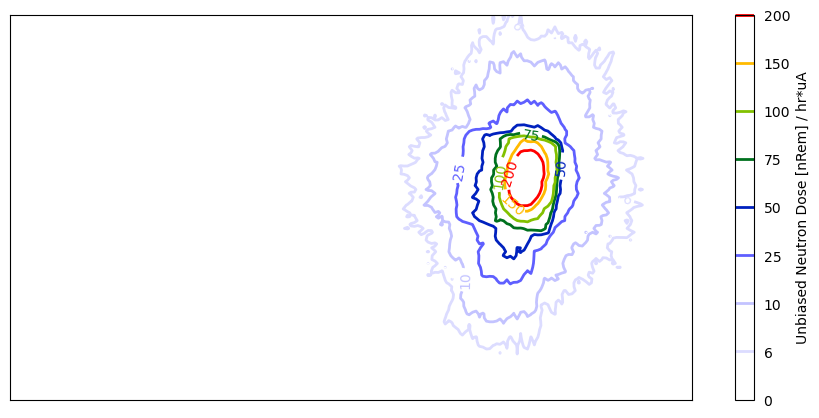

In [11]:
box_mesh_df = pd.read_csv("MeshDump_Raw_35.csv",delimiter=",",names = ["iX", "iY", "iZ", "total(value) [NoUnit]", "total(val^2)", "entry"],skiprows=3)

contour = True

events = 1000000#1000000
efficiency = 268994/events

colors = [
    (0.0, "white"),    # Start with white
    (0.2, "blue"),     # Transition to blue
    (0.4, "green"),    # Transition to green
    (0.6, "yellow"),   # Transition to yellow
    (0.8, "orange"),   # Transition to orange
    (1.0, "red"),      # End with red
]

root_cmap = LinearSegmentedColormap.from_list("ROOT", colors)

x_max = box_mesh_df ["iX"].max()
nx = x_max+1
y_max = box_mesh_df ["iZ"].max()
ny = y_max+1
value = box_mesh_df["total(value) [NoUnit]"]
value_grid = np.zeros((nx,ny))
for i in range(len(value)):
    if (i+1) % ny == 0:
        row_num = int((i+1)/ny)
        #print(value[(i-ny+1):i+1])
        value_grid[row_num-1,:]=value[i-ny+1:i+1]

x_coord = np.linspace(0,x_max+1,nx+1)
y_coord = np.linspace(0,y_max+1,ny+1)

value_grid = value_grid.transpose()

uamps = events*0.828469*1.602E-13*2

print(uamps)

hrs = 3600

value_rems = value_grid*2.25E-2*hrs/uamps/80#2.32E-2

print(sum(value))

fig,ax = plt.subplots()
fig.set_size_inches(11,5)
if contour:
    x_coord = x_coord[:-1]
    y_coord = y_coord[:-1]
    cont = plt.contour(x_coord*8.7/x_max,4.9-y_coord*4.9/y_max,value_rems,cmap=root_cmap,levels=[0,6,10,25,50,75,100,150,200],linewidths=2)##[0,1,3,6,10,15,20,25,40,60][0,6,10,25,50,75,100,150,200][0,0.01,0.05,0.15,0.2,0.3,0.4,0.5]
    cont.clabel()
#plt.pcolormesh(x_coord,y_coord,value_rems,cmap=root_cmap)
plt.ylim(0,4.9)
#plt.xlim(0,4.15+3.15)
colorbar = plt.colorbar()
colorbar.set_label("Unbiased Neutron Dose [nRem] / hr*uA")
colorbar.ax.tick_params(width=0)
#colorbar.set_label("Unbiased Neutron Flux / cell")
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
fig.savefig('../../pics/DoseMap_Raw_35MeV.png',format='png',dpi=300,transparent=True)
plt.show()
#xi,yi = np.meshgrid(x_coord,y_coord)



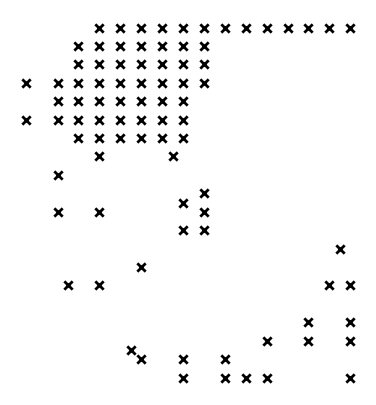

In [79]:
### Graph Grid Points

grid_points = [(7.5,4),(7.5,6),
               (9,4),(9,5),(9,6),(9,9),(9,11),(9.5,15),
               (10,2),(10,3),(10,4),(10,5),(10,6),(10,7),
               (11,1),(11,2),(11,3),(11,4),(11,5),(11,6),(11,7),(11,8),(11,11),(11,15),
               (12,1),(12,2),(12,3),(12,4),(12,5),(12,6),(12,7),(12.5,18.5),
               (13,1),(13,2),(13,3),(13,4),(13,5),(13,6),(13,7),(13,14),(13,19),
               (14,1),(14,2),(14,3),(14,4),(14,5),(14,6),(14,7),(14.5,8),
               (15,1),(15,2),(15,3),(15,4),(15,5),(15,6),(15,7),(15,10.5),(15,12),(15,19),(15,20),
               (16,1),(16,2),(16,3),(16,4),(16,10),(16,11),(16,12),
               (17,1),(17,19),(17,20),
               (18,1),(19,1),(18,20),(20,1),(19,18),(19,20),(21,1),
               (22,1),(21,17),(21,18),
               (23,1),(22,15),
               (22.5,13),(23,15),(23,17),(23,18),(23,20)]

grid_xvals = np.array([])
grid_yvals = np.array([])
for point in grid_points:
    grid_xvals = np.append(grid_xvals,point[0])
    grid_yvals = np.append(grid_yvals,point[1])


figGrid,axGrid = plt.subplots()
figGrid.set_size_inches(4.6,5)

axGrid.scatter(grid_xvals,21-grid_yvals,marker="x",color='black',linewidths=2)
axGrid.set_xticks([])
axGrid.set_yticks([])
axGrid.set_frame_on(False)
figGrid.savefig("../../pics/GriddedPoints.png",format="png",dpi=300,transparent=True)
plt.show()